In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
S0=100
sigma=0.2
r=0.05
T=1/12
K=100

In [216]:
St_list=[]
np.random.seed(19930714)
for j in range(50000):
    St=[]
    S=S0
    for i in range(22):
        x=np.random.randn(1)[0]
        St.append(S)
        S=S*np.exp((r-1/2*sigma**2)*T/21+sigma*np.sqrt(T/21)*x)
    #St.append(S)
    St_list.append(St)

In [207]:
x=np.linspace(0,21,22)


In [5]:
import matplotlib.pyplot as plt

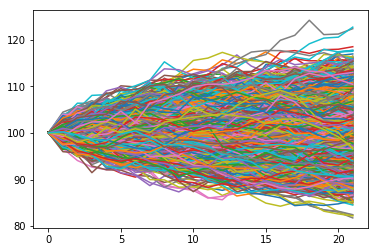

In [208]:
for i in St_list[:3000]:
    plt.plot(x,i)

In [91]:
i[21]

100.3178201205962

In [7]:
def phi(St,K,r,sigma,T,t):
    d1=(np.log(St/K)+(r+1/2*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return norm.cdf(d1)

In [8]:
def psi(St,K,r,sigma,T,t):
    d2=(np.log(St/K)+(r-1/2*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))  
    return -K*np.exp(-r*(T-t))*norm.cdf(d2)

In [21]:
error=0
err=[]
for i in range(20):
    global St
    St=St_list[0]
    del_err=phi(St[i],K,r,sigma,T,i/21*T)*(St[i+1]-St[i])+psi(St[i],K,r,sigma,T,i/21*T)*(np.exp(r*T/21)-1)
    error+=del_err*np.exp(r*(T-i/21*T))
    err.append(error)
error+=phi(St[19],K,r,sigma,T,T)*St[20]+psi(St[19],K,r,sigma,T,T)*(np.exp(r*T/21))-np.maximum(0,s[20]-K)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [36]:
error=0
err=[]
for i in range(21):
    global St
    St=St_list[0]
    Ct=phi(St[i],K,r,sigma,T,i/21*T)*St[i]+psi(St[i],K,r,sigma,T,i/21*T)
    del_err=phi(St[i],K,r,sigma,T,i/21*T)*St[i+1]+psi(St[i],K,r,sigma,T,i/21*T)*(np.exp(r*T/21))-Ct
    print(del_err)                                                                             
    error+=del_err*np.exp(r*(T-i/21*T))
    #error+=del_err
    err.append(error)
error+=phi(St[20],K,r,sigma,T,T*20/21)*St[21]+psi(St[20],K,r,sigma,T,T*20/21)*(np.exp(r*T/21))-np.maximum(0,s[21]-K)

0.21970197462966468
0.3251641633340583
0.967104147385605
-0.2892624743910659
-0.4697683095356524
1.20541704429494
0.3358678160214481
1.037834772206665
-0.8044783784010576
0.8181930540937259
-1.1746884933008204
0.20216692917425405
-0.5296733847718116
0.636357830358321
0.09017573263751899
-0.1399195915069953
-0.5187194051435853
1.115447098250172
-0.9880555754905203
0.764211563609976


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [39]:
phi(St[19],K,r,sigma,T,20/21*T)*St[20]+psi(St[19],K,r,sigma,T,20/21*T)*(np.exp(r*T/21))-np.maximum(0,s[20]-K)

4.906091199174071

In [42]:
psi(St[19],K,r,sigma,T,20/21*T)*(np.exp(r*T/21))

-99.93348868881085

In [34]:
s

[100,
 97.74855714796412,
 96.1685780564238,
 95.46712715217309,
 96.81487096172239,
 99.07190533560023,
 100.85236147823673,
 100.3885123146498,
 100.91964852114539,
 102.83763726349812,
 102.26580674415942,
 101.20291146346673,
 100.80560041901427,
 100.17045104777134,
 99.47872453922928,
 97.81210583929925,
 99.4616203299319,
 98.3907452223916,
 96.11684644797789,
 96.72026744233465,
 96.91919202959518]

In [228]:
err_list=[]
for s in St_list:
    error=0
    for i in range(21):
        del_S=(phi(s[i+1],K,r,sigma,T,(i+1)/21*T)-phi(s[i],K,r,sigma,T,i/21*T))*s[i+1]
        del_B=psi(s[i+1],K,r,sigma,T,(i+1)/21*T)-psi(s[i],K,r,sigma,T,i/21*T)*np.exp(r*T/21)
        #Ct=phi(s[i],K,r,sigma,T,i/21*T)*s[i]+psi(s[i],K,r,sigma,T,i/21*T)
        #del_err=phi(s[i],K,r,sigma,T,i/21*T)*s[i+1]+psi(s[i],K,r,sigma,T,i/21*T)*(np.exp(r*T/21))-Ct
        #print(del_err)
        del_err=del_S+del_B
        error+=del_err*np.exp(r*(T-(i+1)/21*T))
        #error+=del_err
    CT=phi(s[20],K,r,sigma,T,20/21*T)*s[21]+psi(s[20],K,r,sigma,T,20/21*T)*(np.exp(r*T/21))-np.maximum(0,s[21]-K)
    #CT=phi(s[21],K,r,sigma,T,T)*s[21]+psi(s[21],K,r,sigma,T,T)-np.maximum(0,s[21]-K)
    #print(CT,'\t', error)
    error+=CT
    err_list.append(error)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [229]:
np.mean(err_list)

0.0006586927583018056

In [230]:
np.std(err_list,ddof=1)

0.3961317053833002

In [203]:
err_list

array([0.14460424, 0.21759335, 0.22075596, ..., 0.19274414, 0.71595176,
       0.00775535])

In [144]:
min(err_list)

-3.368059666278598

In [150]:
start=-4
stop=4
step=(stop-start)/0.1+1
X=np.linspace(start,stop,step)
X

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


array([-4. , -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. ,
       -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9,
       -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ])

In [163]:
Y=[]
err_list=np.array(err_list)
total=len(err_list)
for i in X:
    num1=len(err_list[err_list<(i+0.05)])
    num2=len(err_list[err_list>(i-0.05)])
    num=num1+num2-total
    Y.append(num)
    

(array([1.8000e-02, 8.8000e-02, 2.7400e-01, 7.2000e-01, 1.3280e+00,
        2.4360e+00, 4.0800e+00, 6.3020e+00, 9.0960e+00, 1.2346e+01,
        1.4562e+01, 1.4042e+01, 1.1616e+01, 8.4200e+00, 5.4340e+00,
        3.5340e+00, 2.1980e+00, 1.4100e+00, 8.0000e-01, 4.9000e-01,
        3.4000e-01, 1.7600e-01, 1.3400e-01, 6.4000e-02, 3.4000e-02,
        2.2000e-02, 1.6000e-02, 1.0000e-02, 8.0000e-03, 2.0000e-03]),
 array([-1.40292670e+00, -1.27541659e+00, -1.14790649e+00, -1.02039638e+00,
        -8.92886276e-01, -7.65376169e-01, -6.37866063e-01, -5.10355957e-01,
        -3.82845850e-01, -2.55335744e-01, -1.27825638e-01, -3.15531153e-04,
         1.27194575e-01,  2.54704682e-01,  3.82214788e-01,  5.09724894e-01,
         6.37235001e-01,  7.64745107e-01,  8.92255213e-01,  1.01976532e+00,
         1.14727543e+00,  1.27478553e+00,  1.40229564e+00,  1.52980575e+00,
         1.65731585e+00,  1.78482596e+00,  1.91233606e+00,  2.03984617e+00,
         2.16735628e+00,  2.29486638e+00,  2.42237649e+00]

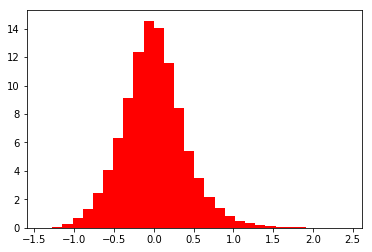

In [233]:
weight=np.ones(50000,)/50000*100
plt.hist(err_list,bins=30,color='r',weights=weight)

In [235]:
dt=pd.DataFrame(err_list)
dt.to_csv('21_err_list.csv')

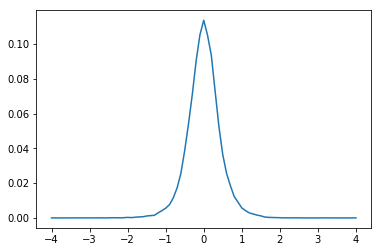

In [179]:
plt.plot(X,Y)

In [192]:
weight

array([2.e-05, 2.e-05, 2.e-05, ..., 2.e-05, 2.e-05, 2.e-05])

In [217]:
St_84=[]
np.random.seed(19930714)
for j in range(50000):
    St=[]
    S=S0
    for i in range(85):
        x=np.random.randn(1)[0]
        St.append(S)
        S=S*np.exp((r-1/2*sigma**2)*T/21+sigma*np.sqrt(T/84)*x)
    #St.append(S)
    St_84.append(St)

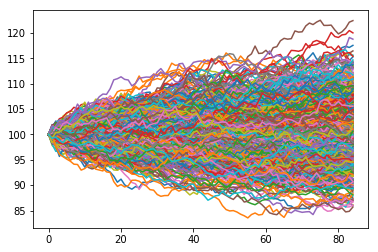

In [218]:
x=np.linspace(0,84,85)
for i in St_84[:1000]:
    plt.plot(x,i)

In [219]:
err_list_84=[]
for s in St_84:
    error=0
    for i in range(84):
        del_S=(phi(s[i+1],K,r,sigma,T,(i+1)/84*T)-phi(s[i],K,r,sigma,T,i/84*T))*s[i+1]
        del_B=psi(s[i+1],K,r,sigma,T,(i+1)/84*T)-psi(s[i],K,r,sigma,T,i/84*T)*np.exp(r*T/84)
        #Ct=phi(s[i],K,r,sigma,T,i/21*T)*s[i]+psi(s[i],K,r,sigma,T,i/21*T)
        #del_err=phi(s[i],K,r,sigma,T,i/21*T)*s[i+1]+psi(s[i],K,r,sigma,T,i/21*T)*(np.exp(r*T/21))-Ct
        #print(del_err)
        del_err=del_S+del_B
        error+=del_err*np.exp(r*(T-(i+1)/84*T))
        #error+=del_err
    CT=phi(s[83],K,r,sigma,T,83/84*T)*s[84]+psi(s[83],K,r,sigma,T,83/84*T)*(np.exp(r*T/84))-np.maximum(0,s[84]-K)
    #CT=phi(s[21],K,r,sigma,T,T)*s[21]+psi(s[21],K,r,sigma,T,T)-np.maximum(0,s[21]-K)
    #print(CT,'\t', error)
    error+=CT
    err_list_84.append(error)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


(array([2.0000e-03, 0.0000e+00, 1.4000e-02, 8.6000e-02, 2.0200e-01,
        5.6400e-01, 1.3760e+00, 3.1600e+00, 6.3280e+00, 1.2548e+01,
        1.9882e+01, 2.2224e+01, 1.6294e+01, 8.9200e+00, 4.4460e+00,
        2.0720e+00, 9.6400e-01, 4.9400e-01, 2.1000e-01, 1.0200e-01,
        3.8000e-02, 3.8000e-02, 2.0000e-02, 6.0000e-03, 6.0000e-03,
        4.0000e-03]),
 array([-1.14137839, -1.04013433, -0.93889026, -0.8376462 , -0.73640214,
        -0.63515808, -0.53391402, -0.43266996, -0.3314259 , -0.23018184,
        -0.12893778, -0.02769372,  0.07355034,  0.1747944 ,  0.27603846,
         0.37728253,  0.47852659,  0.57977065,  0.68101471,  0.78225877,
         0.88350283,  0.98474689,  1.08599095,  1.18723501,  1.28847907,
         1.38972313,  1.49096719]),
 <a list of 26 Patch objects>)

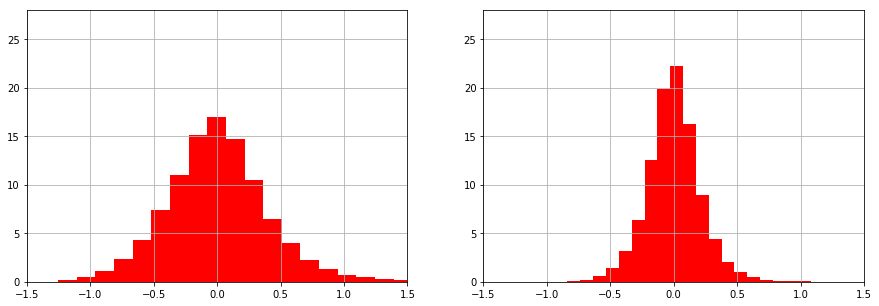

In [247]:
weight=np.ones(50000,)/50000*100
fig=plt.figure(1,figsize=[15,5])
plt.subplot(1,2,1)
plt.grid()
plt.ylim(0,28)
plt.xlim(-1.5,1.5)
plt.hist(err_list,bins=26,color='r',weights=weight)
plt.subplot(1,2,2)
plt.grid()
plt.ylim(0,28)
plt.xlim(-1.5,1.5)
plt.hist(err_list_84,bins=26,color='r',weights=weight)

In [221]:
np.std(err_list_84)

0.21024818896864927

In [222]:
np.mean(err_list_84)

0.00040161724785348497

In [224]:
import pandas as pd

In [225]:
list=pd.DataFrame(err_list_84)

In [227]:
list.to_csv('84_err_list.csv')

In [249]:
print('Mean of 21 steps: %0.4f'%np.mean(err_list))
print('Standard deviation of 21 steps: %0.4f'%np.std(err_list,ddof=1))

Mean of 21 steps: 0.0007
Standard deviation of 21 steps: 0.3961


In [250]:
print('Mean of 84 steps: %0.4f'%np.mean(err_list_84))
print('Standard deviation of 84 steps: %0.4f'%np.std(err_list_84,ddof=1))

Mean of 84 steps: 0.0004
Standard deviation of 84 steps: 0.2103
